In [6]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from psikit import Psikit
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [7]:
pk=Psikit(debug=True,threads=1,memory=12)

In [8]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [9]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571158112221

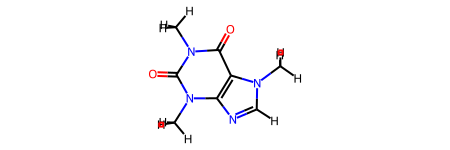

In [10]:
pk.mol

In [11]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-1.91792555e-01  5.57340003e-02  9.87793886e-02 -4.77011264e-01
  1.21825320e-01 -1.18999064e-01  4.01732205e-01 -5.05410402e-01
 -5.91570813e-02  3.54633091e-01 -5.26300972e-01  4.41424881e-02
 -4.64522591e-04 -4.71258086e-02  1.09117075e-01  1.09117075e-01
  1.09117075e-01  1.72614504e-01  5.07713712e-02  5.07713712e-02
  5.07713712e-02  6.57117780e-02  6.57117780e-02  6.57117780e-02]
[-0.11403795 -0.6938314   0.38633761 -0.62281396  0.63501747  0.09321171
  0.89983409 -0.63014503 -0.87909484  1.09567057 -0.62723432 -0.87749274
 -0.12044053 -0.12342211  0.16697312  0.16760151  0.12972096  0.18241467
  0.14987611  0.14801313  0.16746529  0.17511165  0.14594831  0.14531669]
[-0.1322648  -0.05215594  0.07684039 -0.27532386  0.13946394 -0.12563598
  0.29431091 -0.39461855 -0.18852891  0.34869523 -0.39863739 -0.15259724
 -0.13212541 -0.13796275  0.11655046  0.11806769  0.10426654  0.12162576
  0.10826969  0.10785014  0.11932543  0.12164679  0.10659751  0.10634036]


In [12]:
mol = pk.mol
atoms = mol.GetAtoms()

In [13]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [14]:
df = pd.DataFrame(data)

In [15]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.192,-0.114,-0.132
1,N,0.056,-0.694,-0.052
2,C,0.099,0.386,0.077
3,N,-0.477,-0.623,-0.275
4,C,0.122,0.635,0.139
5,C,-0.119,0.093,-0.126
6,C,0.402,0.900,0.294
7,O,-0.505,-0.630,-0.395
8,N,-0.059,-0.879,-0.189
9,C,0.355,1.096,0.349


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
plt.style.use('ggplot')

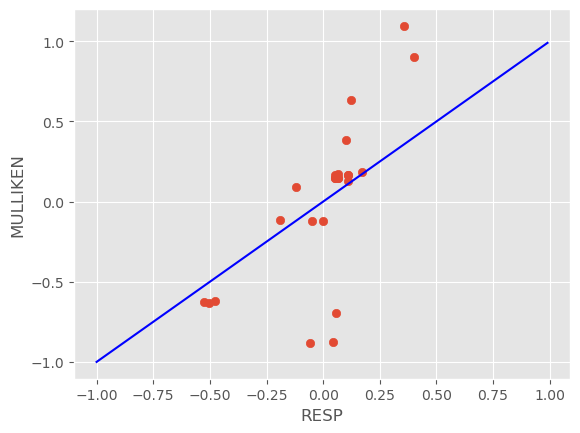

In [18]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

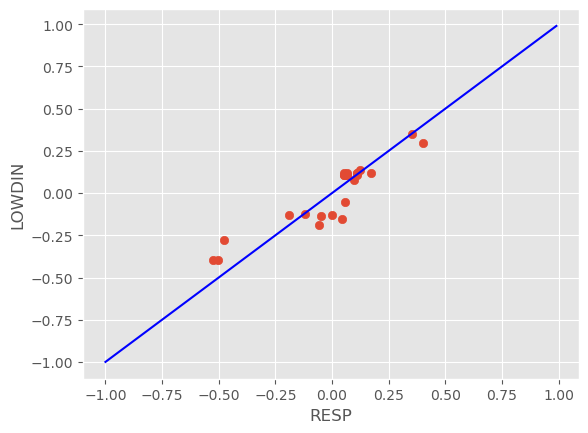

In [19]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

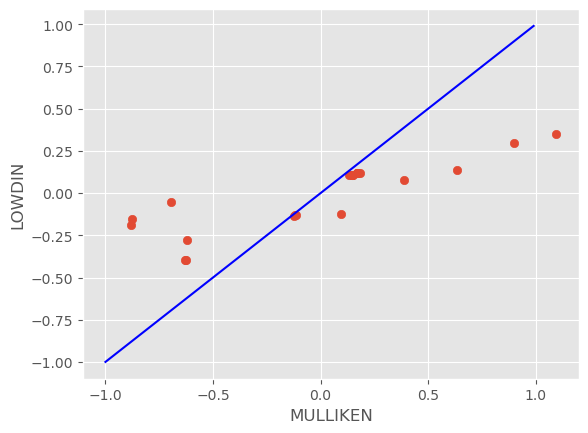

In [20]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

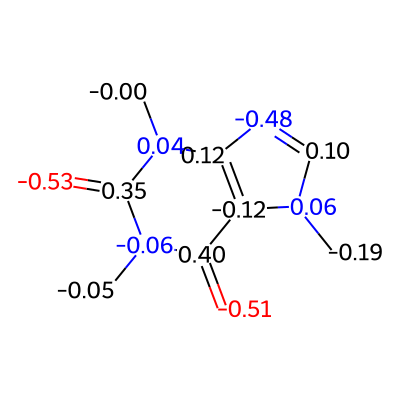

In [23]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

resp_charges = df.RESP
molecule = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

# Add RESP charges as atom properties
for atom, charge in zip(molecule.GetAtoms(), resp_charges):
    atom.SetProp("RESP", f"{charge:.2f}")

# Drawing options
drawer = rdMolDraw2D.MolDraw2DSVG(400, 400)
opts = drawer.drawOptions()

for i in range(molecule.GetNumAtoms()):
    opts.atomLabels[i] = molecule.GetAtomWithIdx(i).GetProp("RESP")

# Draw the molecule
drawer.DrawMolecule(molecule)
drawer.FinishDrawing()
svg = drawer.GetDrawingText().replace('svg:', '')

# Display in Jupyter notebook
SVG(svg)